# Capstone Project 3 : Bank Marketing Campaign
### by Faykel Nicandro Hattu

## Business Problem

**Latar Belakang:**

Jenis produk keuangan yang beredar dan digunakan oleh masyarakat semakin bertambah dari tahun ke tahun. Salah satu produk keuangan yang cukup diketahui masyarakat adalah deposito berjangka. Mekanisme deposito berjangka sendiri adalah nasabah menyetorkan sejumlah uang kepada bank atau sebuah lembaga keuangan dan uang tersebut hanya akan bisa diambil setelah melewati jangka waktu tertentu. Sebagai bentuk imbalan, nasabah akan diberi bunga tetap sesuai nominal uang yang disetor.

Bank sebagai sebuah badan usaha yang telah memiliki produk keuangan terlebih dahulu dan juga memiliki nasabah yang lebih banyak, tetap harus bersaing agar tidak kehilangan nasabah. Salah satunya dengan melakukan marketing campaign.

Deposit(Target) :    

0 : Tidak berinvestasi di deposito berjangka

1 : Berinvestasi di deposito berjangka

**Pernyataan Masalah:**

Proses *marketing act* atau menghubungi nasabah akan memakan waktu dan sumber daya yang besar bila dilakukan dengan menyeluruh. Maka dari itu, melakukan klasifikasi nasabah akan sangat membantu tim marketing melakukan campaign kepada nasabah yang tepat sehingga dapat mengurangi sumber daya yang dikeluarkan dengan tingkat keberhasilan yang lebih maksimal.

**Tujuan:**

Dengan permasalahan tersebut, maka bank ingin mampu memprediksi nasabah mana yang ingin dan mampu untuk mengikuti deposito berjangka seperti yang ditawarkan. Selain itu, bank juga ingin mengetahui faktor apa saja yang mempengaruhi seorang nasabah mau menggunakan produk deposito berjangka.

**Analisa:**

Untuk memenuhi tujuan diatas, kita akan membuat analisa data untuk menemukan algoritma dari nasabah mana yang mau dan tidak mau untuk menggunakan produk deposito berjangka. Selain menganalisa, model klasifikasi juga akan dibuat guna membantu bank untuk memprediksi atau menghitung kemungkinan nasabah akan menggunakan deposito berjangka atau tidak.

**Metrics**

Evaluasi performa pada metric terbagi menjadi 4, yaitu:
|  | Predict not Invest | Predict to Invest |
| --- | --- | --- |
| Actual not Invest | True Negative | False Positive |
| Actual Invest | False Negative | True Positive |

Dari 4 metric diatas, ada 2 yang masuk kategori error atau tidak sama dengan prediksi:
1. False Positive    
Beresiko sumber daya dan waktu menjadi sia-sia dalam melakukan marketing
2. False Negative      
Beresiko kehilangan nasabah yang ingin dan mau untuk menggunakan deposito berjangka

Dengan resiko-resiko tersebut, model klasifikasi yang dibuat harus sesuai dengan permasalahan bisnis yaitu mengutamakan agar tidak kehilangan nasabah yang berpotensi menggunakan produk deposito berjangka dengan tanpa mengabaikan pemborosan sumber daya dan waktu yang digunakan.

## Data Understanding

Sumber Data : https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset

Note:   
- Setiap baris merepresentasikan informasi orang yang telah menerima marketing campaign dan hasil marketing campaign.
- Dataset dibuat oleh Sérgio Moro, Paulo Cortez dan Paulo Rita pada tahun 2014. Data diambil dari Bank Portugal, dan dapat digunakan oleh publik untuk penelitian.
- Terdapat 4 kolom data bersifat numerik dan 7 kolom data bersifat kategorik (Nominal, Ordinal dan Binary) yang memiliki tingat kardinalitas yang relatif rendah.

| Attribute | Description |
| --- | --- |
| age | Umur nasabah |  
| job | Pekerjaan nasabah |
| balance | Saldo |
| housing | Memiliki cicilan rumah atau tidak |
| loan | Memiliki pinjaman pribadi atau tidak | 
| contact | Tipe kontak untuk menghubungi pelanggan |
| month | Bulan terakhir dihubungi dalam tahun campaign ini |
| campaign | Jumlah nasabah dihubungi pada periode campaign ini | 
| pdays | Jumlah hari sejak terakhir dihubungi pada periode campaign sebelumnya |
| poutcome | Hasil pada campaign periode sebelumnya |
| deposit | Memiliki deposito atau tidak |

In [716]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline

# import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Model
import pickle
import joblib

In [717]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [719]:
df.shape

(7813, 11)

In [720]:
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


## Data Cleaning

In [721]:
Item = []
for col in df.columns :
    Item.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=Item)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,object,0,0.0,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,int64,0,0.0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,object,0,0.0,2,"[no, yes]"
4,loan,object,0,0.0,2,"[no, yes]"
5,contact,object,0,0.0,3,"[cellular, telephone, unknown]"
6,month,object,0,0.0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,int64,0,0.0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,int64,0,0.0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,object,0,0.0,4,"[unknown, other, failure, success]"


Pada tabel diatas tidak terdapat missing value yang benar-benar "missing", namun terdapat 3 kolom dengan missing value (unknown) dan 1 jenis data yang typo yaitu "admin." pada kolom job. 

Selain itu, ada value "-1" pada kolom pdays tanpa ada keterangan dari sumber data. Maka dari itu, "-1" dianggap tidak dihubungi pada periode sebelumnya.

In [722]:
df['balance'].nunique()

3153

### Data Duplicate

In [723]:
# Cek keberadaan duplukasi data
print(df.duplicated().sum())
print(df.shape)

8
(7813, 11)


In [724]:
# Menghapus duplikasi data
df.drop_duplicates(inplace=True)

In [725]:
df.shape
# Sudah berkurang dari 7813 menjadu 7805

(7805, 11)

### Typo

Pada kolom job, value "admin." akan diubah menjadi "admin".

In [726]:
df['job'] = df['job'].replace('admin.', 'admin')

In [727]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


### Missing Value

#### Kolom "Job"

In [728]:
df['job'].value_counts()

management       1789
blue-collar      1343
technician       1289
admin             936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: job, dtype: int64

Pada kolom 'job', missing value (unknown) akan diubah menjadi 'other' untuk menghindari kekeliruan pada pemahaman data.

In [729]:
df['job'] = df['job'].replace('unknown', 'others')

#### Kolom "contact"

In [730]:
df['contact'].value_counts()

cellular     5623
unknown      1636
telephone     546
Name: contact, dtype: int64

Pada kolom "contact", missing value (unknown) juga akan diubah menjadi other.

In [731]:
df['contact'] = df['contact'].replace('unknown', 'other')

#### Kolom "poutcome"

In [732]:
df['poutcome'].value_counts()

unknown    5811
failure     848
success     761
other       385
Name: poutcome, dtype: int64

Pada kolom "poutcome", missing value (unknown) akan diubah menjadi "uncontacted" karena untuk ukuran hasil hanya ada 2 kategori yaitu berhasil atau gagal. Sedangkan kemungkinan lain hanya nasabah belum dihubungi. Selain itu, value "other" juga akan diubah menjadi "uncontacted".

In [733]:
df['poutcome'] = df['poutcome'].replace('unknown', 'uncontacted')
df['poutcome'] = df['poutcome'].replace('other', 'uncontacted')

### Data Checking

In [734]:
n_unique = []
unique = []
name = []

for column in df.select_dtypes(include='O'):
  n_unique.append(df[column].nunique())
  unique.append(df[column].unique())
  name.append(column)

df_unique = pd.DataFrame({"Column": name,"N-Unique":n_unique, "Unique":unique})
df_unique

,Column,N-Unique,Unique
0,job,12,"[admin, self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, others]"
1,housing,2,"[no, yes]"
2,loan,2,"[no, yes]"
3,contact,3,"[cellular, telephone, other]"
4,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
5,poutcome,3,"[uncontacted, failure, success]"
6,deposit,2,"[yes, no]"


Dari data yang menjadi perhatian (missing value dan typo), tabel diatas menunjukkan bahwa data sudah ditangani dengan baik.

### Outlier

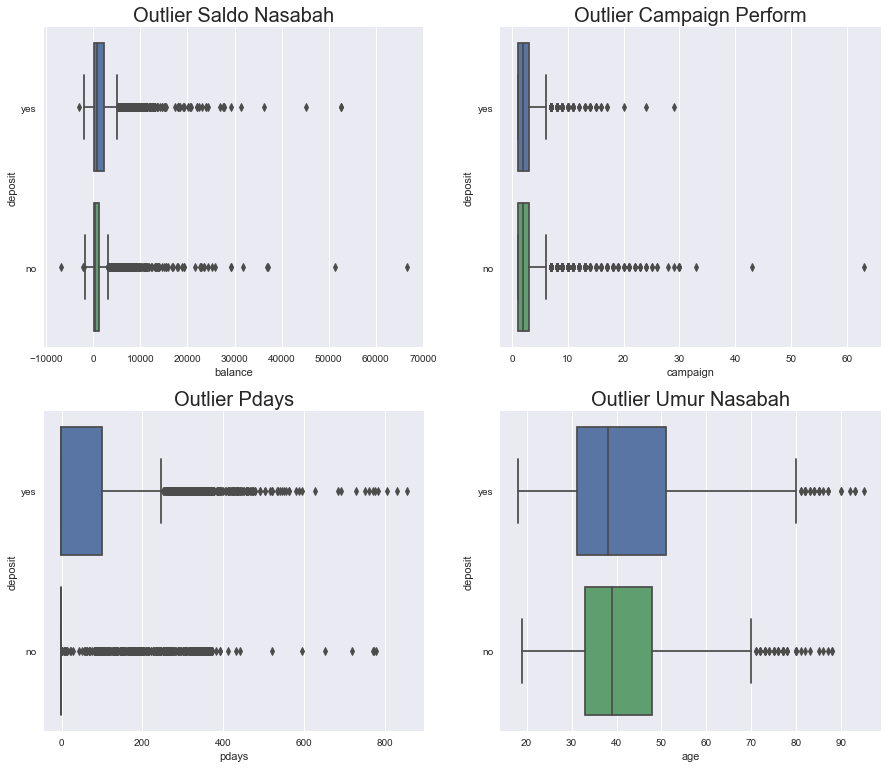

In [735]:
plt.figure(figsize=(15,20))
plt.subplot(321)
sns.boxplot(data=df,x='balance', y='deposit')
plt.title('Outlier Saldo Nasabah',fontsize=20)

plt.subplot(322)
sns.boxplot(data=df, x='campaign', y='deposit')
plt.title('Outlier Campaign Perform',fontsize=20)

plt.subplot(323)
sns.boxplot(data=df, x='pdays', y='deposit')
plt.title('Outlier Pdays',fontsize=20)

plt.subplot(324)
sns.boxplot(data=df, x='age', y='deposit')
plt.title('Outlier Umur Nasabah',fontsize=20)

plt.show()

Terdapat outlier pada data, namun masih dianggap wajar pada masing-masing kolom sehingga tidak perlu dilakukan treatment.

## Data Analysis

In [736]:
df['deposit'].value_counts()

no     4075
yes    3730
Name: deposit, dtype: int64

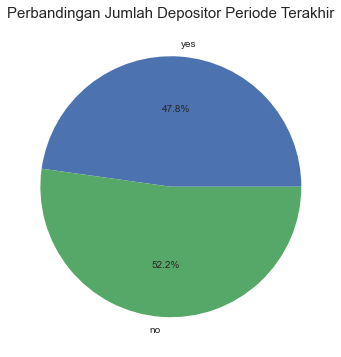

In [737]:
deposit_value = ['yes', 'no']
deposit_value_count = [3730,4075]
plt.figure(figsize=(6,6))
plt.axes().pie(deposit_value_count, labels = deposit_value, autopct='%.1f%%')
plt.title('Perbandingan Jumlah Depositor Periode Terakhir', size=15)
plt.show()

Plot diatas menunjukkan bahwa keseimbangan data antara 1 dan 0 relatif seimbang sehingga tidak perlu dilakukan treatment Data Imbalance. Selain itu, didapatkan juga bahwa lebih banyak nasabah tidak menggunakan produk deposito berjangka dibandingkan yang menggunakan deposito berjangka sebagai investasi mereka.

In [738]:
df1 = df.copy()
def KategoriSaldo (Saldo): 
    if (Saldo >= -7000) & (Saldo < -3000): 
        return "<-3000"
    elif (Saldo >= -3000) & (Saldo < 0):
        return "-3000 - 0"
    elif (Saldo >= 0) & (Saldo < 1000):
        return "0 - 10000"
    elif (Saldo >= 10000) & (Saldo < 20000 ):
        return "10000 - 20000"
    elif (Saldo >= 20000) & (Saldo < 30000):
        return "20000 - 30000"
    elif Saldo>=30000:
        return ">30000"    
df1["Kategori Saldo"] = df1["balance"].apply(lambda Saldo: KategoriSaldo(Saldo))

def KategoriCampaign (Campaign): 
    if (Campaign >= 0) & (Campaign < 6): 
        return "0-5"
    elif (Campaign >= 6) & (Campaign < 11):
        return "05-10"
    elif (Campaign >= 11) & (Campaign < 16):
        return "10-15"
    elif Campaign>=16:
        return ">15"    
df1["Kategori Campaign"] = df1["balance"].apply(lambda Campaign: KategoriCampaign(Campaign))

def KategoriPdays (Pdays): 
    if (Pdays >= -1) & (Pdays < 0): 
        return "uncontacted"
    elif (Pdays >= 1) & (Pdays < 31):
        return "1 month"
    elif (Pdays >= 31) & (Pdays < 92):
        return "2-3 months"
    elif (Pdays >= 92) & (Pdays < 185 ):
        return "3-6 months"
    elif (Pdays >= 185) & (Pdays < 366):
        return "6-12 months"
    elif Pdays>=366:
        return "> 1 year"    
df1["Kategori Pdays"] = df1["balance"].apply(lambda Pdays: KategoriPdays(Pdays))

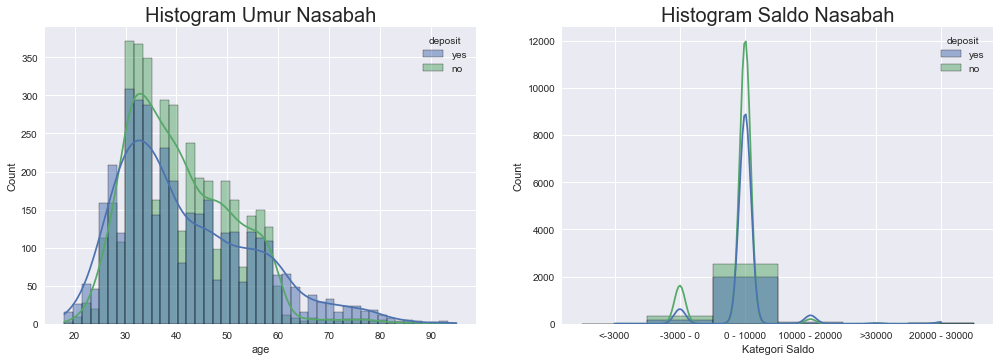

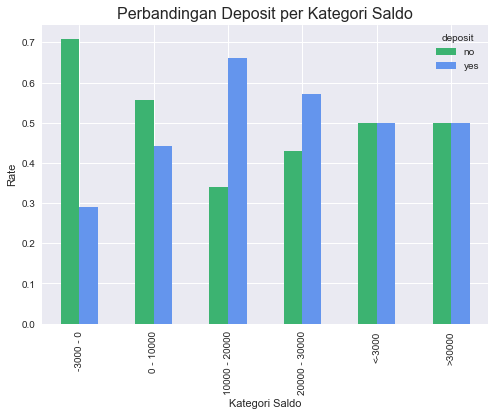

In [739]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='age',hue='deposit',kde=True)
plt.title('Histogram Umur Nasabah',fontsize=20)

plt.subplot(222)
sns.histplot(data=df1,x='Kategori Saldo',hue='deposit',kde=True)
plt.title('Histogram Saldo Nasabah',fontsize=20)

ct_saldo=pd.crosstab(df1['Kategori Saldo'],df1['deposit'],normalize='index')
ct_saldo.plot(kind='bar', color = ('mediumseagreen', 'cornflowerblue'))
plt.title('Perbandingan Deposit per Kategori Saldo', fontsize=16)
plt.ylabel('Rate')

plt.show()

Dari data diatas didapatkan bahwa:
1. Nasabah dengan umur dibawah 30 dan diatas 60 lebih banyak memilih menggunakan produk deposito berjangka
2. Nasabah dengan nilai saldo antara 10000 hingga 30000 lebih banyak memilih untuk berinvestasi deposito berjangka dibandingkan dengan kategori lainnya

Untuk nilai pada kolom "pdays" dan "campaign", akan dianalisa dibawah ini.

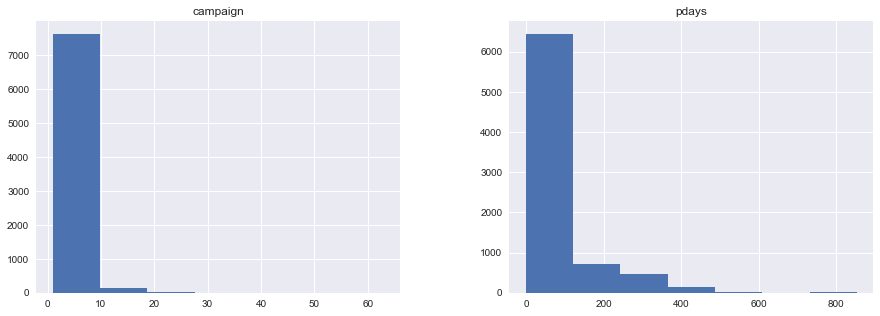

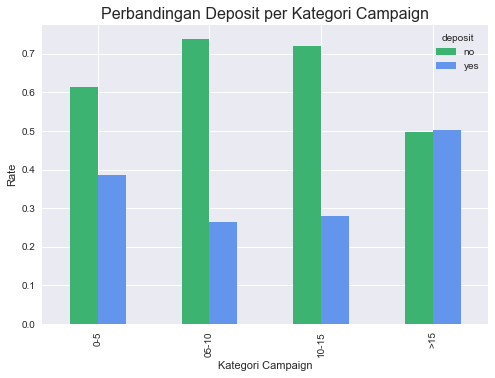

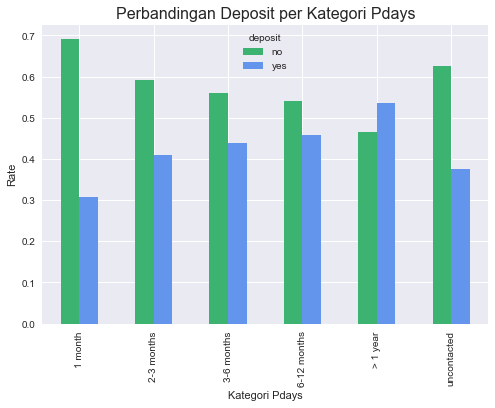

In [740]:
df[['campaign', 'pdays']].hist(figsize = (15,5), bins=7)

ct_campaign=pd.crosstab(df1['Kategori Campaign'],df1['deposit'],normalize='index')
ct_campaign.plot(kind='bar', color = ('mediumseagreen', 'cornflowerblue'))
plt.title('Perbandingan Deposit per Kategori Campaign', fontsize=16)
plt.ylabel('Rate')

ct_pdays=pd.crosstab(df1['Kategori Pdays'],df1['deposit'],normalize='index')
ct_pdays.plot(kind='bar', color = ('mediumseagreen', 'cornflowerblue'))
plt.title('Perbandingan Deposit per Kategori Pdays', fontsize=16)
plt.ylabel('Rate')
plt.show()

Dari analisa kolom campaign dan pdays diatas didapatkan:
1. Marketing approach (campaign) dilakukan dengan proporsi terbanyak 1-7 kali setiap nasabah, dengan convertion rate terbaik ada pada nasabah yang dihubungi lebih dari 15x (50% berbanding 49%). Namun, nasabah yang diapproach antara 1-5 kali tetap memiliki jumlah depositor terbanyak, disusul dengan 5-10 kali.
2. Kategori jarak approach terbanyak kepada nasabah dari sesi campaign yang lalu adalah dibawah 3 bulan (90-100 days). Namun jarak approach lebih dari 1 tahun (365 days), memiliki convertion rate yang lebih tinggi (+-54%).

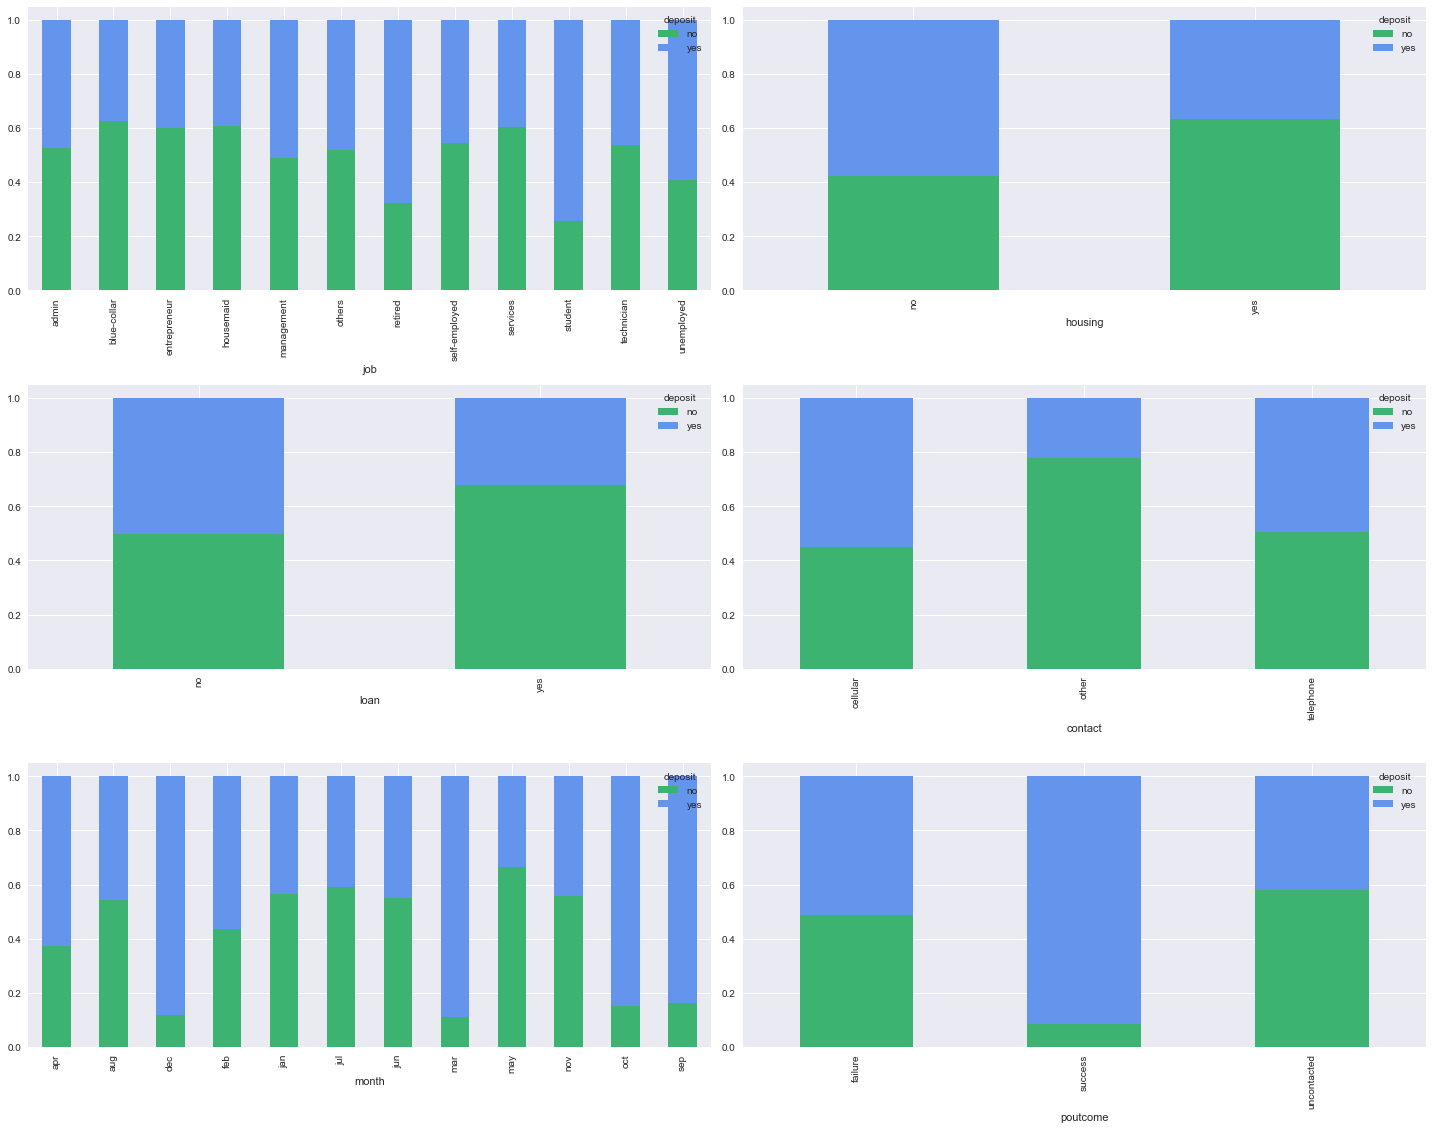

In [741]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['deposit','pdays','age', 'campaign', 'balance']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['deposit'],normalize=0).plot(kind='bar',stacked=True,ax=ax, color = ('mediumseagreen', 'cornflowerblue'))
    fig.tight_layout()

plt.show()

In [742]:
for i in df.drop(columns=['deposit','pdays','age', 'campaign', 'balance']).columns:
    analisa_kategorik = df.groupby(i)['deposit'].value_counts(normalize=True).unstack()
    display(analisa_kategorik)


deposit,no,yes
job,,
admin,0.525641,0.474359
blue-collar,0.625465,0.374535
entrepreneur,0.601695,0.398305
housemaid,0.608696,0.391304
management,0.489659,0.510341
others,0.518519,0.481481
retired,0.324074,0.675926
self-employed,0.546429,0.453571
services,0.604863,0.395137


deposit,no,yes
housing,,
no,0.422631,0.577369
yes,0.634233,0.365767


deposit,no,yes
loan,,
no,0.498599,0.501401
yes,0.677734,0.322266


deposit,no,yes
contact,,
cellular,0.448871,0.551129
other,0.779340,0.220660
telephone,0.505495,0.494505


deposit,no,yes
month,,
apr,0.373112,0.626888
aug,0.542091,0.457909
dec,0.117647,0.882353
feb,0.436330,0.563670
jan,0.563877,0.436123
jul,0.591039,0.408961
jun,0.550758,0.449242
mar,0.110553,0.889447
may,0.666498,0.333502


deposit,no,yes
poutcome,,
failure,0.487028,0.512972
success,0.085414,0.914586
uncontacted,0.580536,0.419464


Dari plot dan tabel diatas, dapat diambil informasi sebagai berikut:
1. `Pelajar` (74%), `pensiunan` (67%) dan `pengangguran` (59%) menjadi `profesi` nasabah terbanyak yang memilih deposito sebagai produk investasi mereka. Sedangkan yang terkecil adalah nasabah dengan pekerjaan sebagai blue-collar / pekerja kasar yaitu 39%. 
2. Nasabah yang `tidak memiliki cicilan rumah`, lebih banyak memilih untuk berinvestasi di deposito dengan proporsi `57,7%`. Dapat diambil insight bahwa kepemilikan cicilan rumah pengaruhnya `tidak terlalu signifikan`.
3. Nasabah yang `tidak memiliki pinjaman pribadi` yang memilih berinvestasi di deposito hampir sama dengan yang tidak mau dengan proporsi 50,1% dan 49,9%. Dapat dikatakan bahwa kepemilikan pinjaman pribadi bisa dibilang `memiliki pengaruh sangat kecil` karena hanya memiliki perbedaan 0,2%.
4. Nasabah yang memiliki kontak berupa `nomor handphone` memiliki konvertion rate paling tinggi `(55,1%)` dibandingkan dengan telepon biasa (49,5%) dan pilihan lainnya (22,1%). Tipe kontak yang digunakan untuk menghubungi nasabah dinilai sedikit berpengaruh, dimana tipe kontak lebih condong kepada nomor handphone.
5. Bulan `Maret, September, Oktober` dan `Desember` menjadi bulan yang paling banyak nasabah berinvestasi di deposito berjangka dengan proporsi `lebih dari 80%`. Hal ini menunjukkan bahwa waktu pada marketing approach cukup berpengaruh.
6. Korelasi hasil campaign periode ini dan periode yang lalu menunjukkan bahwa nasabah yang `berinvestasi deposito pada periode lalu` memiliki proporsi lebih dari `91%` yang kembali berinvestasi di deposito di periode ini. Meninggalkan hasil lainnya yaitu yang tidak berinvestasi di periode sebelumnya (51,2%) dan yang tidak dihubungi pada periode sebelumnya (41,9%). Ini menunjukkan bahwa nasabah yang berinvestasi deposito pada periode sebelumnya memiliki pengaruh yang signifikan.

## Data Preparation

In [743]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin,1662,no,no,cellular,jun,2,-1,uncontacted,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,uncontacted,yes
2,51,admin,3025,no,no,cellular,may,1,352,uncontacted,yes
3,38,services,-87,yes,no,cellular,may,1,-1,uncontacted,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,uncontacted,no


Setelah melalui pemahaman data, akan dilakukan data preprocessing. Salah satunya yaitu Encoding. Berikut analisa data yang akan di encoding beserta jenis encodingnya:
1. Melakukan `One Hot Encoding` pada kolom `housing, loan, contact` dan `poutcome` karena memiliki variasi value yang sedikit (2 atau 3 value) namun tidak data memiliki urutan.
2. Melakukan `Ordinal Encoding` pada kolom `month` karena memiliki susunan bulan yang urut dari Januari hingga Desember.
3. Melakukan `Binary Encoding` pada kolom `job` karena memiliki variasi value yang banyak dan data tidak memiliki urutan. Selain itu, bila menggunakan One Hot Encoding, fitur yang terbuat akan terlalu banyak.

In [744]:
ordinal_mapping = [
    {'col':'month',
    'mapping':{
        'jan'       :    0,
        'feb'       :    1, 
        'mar'       :    2, 
        'apr'       :    3, 
        'may'       :    4, 
        'jun'       :    5,
        'jul'       :    6,
        'aug'       :    7,
        'sep'       :    8, 
        'oct'       :    9, 
        'nov'       :    10, 
        'dec'       :    11,
    }}
]

In [745]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['housing', 'loan', 'contact', 'poutcome']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['month']),
    ('binary', ce.BinaryEncoder(), ['job']),
], remainder='passthrough')

In [746]:
x = df.drop(columns=['deposit'])
y = np.where(df['deposit'] == 'yes', 1 ,0)

In [747]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2022)

In [748]:
x_train_preprocessed = transformer.fit_transform(x_train)
x_train_preprocessed

array([[ 0.000e+00,  0.000e+00,  0.000e+00, ...,  1.039e+03,  3.000e+00,
        -1.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  9.490e+02,  1.000e+00,
        -1.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  5.359e+03,  1.000e+00,
         1.910e+02],
       ...,
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  7.100e+02,  2.000e+00,
        -1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.304e+03,  2.000e+00,
        -1.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  1.285e+03,  2.000e+00,
         2.000e+00]])

In [749]:
testing = pd.DataFrame(x_train_preprocessed, columns = transformer.get_feature_names())
testing

,onehot__x0_yes,onehot__x1_yes,onehot__x2_other,onehot__x2_telephone,onehot__x3_success,onehot__x3_uncontacted,ordinal__month,binary__job_0,binary__job_1,binary__job_2,binary__job_3,age,balance,campaign,pdays
0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,1.0,34.0,1039.0,3.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,1.0,0.0,40.0,949.0,1.0,-1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,30.0,5359.0,1.0,191.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,80.0,997.0,1.0,91.0
4,0.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,47.0,1453.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,0.0,0.0,0.0,0.0,0.0,1.0,10.0,1.0,1.0,0.0,0.0,35.0,759.0,3.0,-1.0
6240,1.0,1.0,1.0,0.0,0.0,1.0,4.0,1.0,0.0,1.0,1.0,40.0,1516.0,1.0,-1.0
6241,1.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,1.0,1.0,39.0,710.0,2.0,-1.0
6242,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,1.0,33.0,1304.0,2.0,-1.0


## Modeling & Evaluation

In [750]:
logreg = LogisticRegression(random_state=2020)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=2020)
rf = RandomForestClassifier(random_state=2020)
xgb = XGBClassifier(random_state=2020, verbosity=0)

### Model Benchmarking : K-Fold

In [751]:
models = [logreg,knn,dt,rf,xgb]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

,mean roc_auc,sdev
model,,
Random Forest,0.759236,0.013543
XGBoost,0.756515,0.012730
Logistic Regression,0.716488,0.012396
Decision Tree,0.627129,0.009874
KNN,0.615637,0.014651


Didapatkan model Random Forest (75,9%) dan XGBoost (75,6%) memilik nilai roc_auc tertinggi dari setiap model dengan parameter default.

### Model Benchmarking : Test Data

In [752]:
models = [logreg,knn,dt,rf,xgb]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       815
           1       0.65      0.61      0.63       746

    accuracy                           0.66      1561
   macro avg       0.66      0.66      0.66      1561
weighted avg       0.66      0.66      0.66      1561

KNN 
               precision    recall  f1-score   support

           0       0.60      0.67      0.63       815
           1       0.59      0.52      0.55       746

    accuracy                           0.60      1561
   macro avg       0.60      0.59      0.59      1561
weighted avg       0.60      0.60      0.59      1561

Decision Tree 
               precision    recall  f1-score   support

           0       0.65      0.66      0.65       815
           1       0.62      0.62      0.62       746

    accuracy                           0.64      1561
   macro avg       0.64      0.64      0.64      1561
weighted avg       0.64      0

,roc_auc score
model,
XGBoost,0.769491
Random Forest,0.756212
Logistic Regression,0.720007
Decision Tree,0.637145
KNN,0.623823


Setelah melihat hasil benchmarking dari data train dan data test didapatkan:
1. Perbandingan data train dan test hasil Model XGBoost adalah 75.6515 : 76.9491
2. Perbandingan data train dan test hasil Model Random Forest adalah 75.9236 : 75.6212

### Hyperparameter Tuning

Pada default, parameter dari masing-masing model adalah:
1. Random Forest => n_estimator = 100, max_depth = None, min_samples_split = 2, min_samples_leaf = 1, max_features = none
2. XGBoost => n_estimator = 100, max_depth = 6, learning_rate = 0.3, colsample_bytree = 1

In [753]:
xgb = XGBClassifier(random_state=2020, verbosity=0, use_label_encoder=False)
dt = DecisionTreeClassifier(random_state=2020)

rf_pip = Pipeline([ ('preprocess', transformer), ('clf_rf', rf)]) 
xgb_pip = Pipeline([ ('preprocess', transformer), ('clf_xgb', xgb)])
skfold=StratifiedKFold(n_splits=10, random_state=2020, shuffle=True)

# RandomForest
param_grid_rf = {
              'clf_rf__n_estimators':[278], 
              'clf_rf__max_depth':[11],
              'clf_rf__min_samples_split':[7],
              'clf_rf__min_samples_leaf':[2],
              'clf_rf__max_features':[5],
             }

rf_clf = GridSearchCV(estimator = rf_pip,
                      param_grid = param_grid_rf, 
                      cv = skfold, 
                      scoring = 'roc_auc',
                      refit = 'recall',
                      error_score = 'raise', 
                      verbose = 2)

rf_clf.fit(x_train, y_train)

# XGBClassifier
param_grid_xgb = {
              'clf_xgb__n_estimators':[549],
              'clf_xgb__max_depth':[7],
              'clf_xgb__learning_rate':[0.008],
              'clf_xgb__colsample_bytree':[0.5],
              'clf_xgb__random_state':[2020]}

xgb_clf = GridSearchCV(estimator = xgb_pip,
                      param_grid = param_grid_xgb, 
                      cv = skfold, 
                      scoring = 'roc_auc',
                      refit = 'recall',
                      error_score = 'raise', 
                      verbose = 2)
                     
xgb_clf.fit(x_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END clf_rf__max_depth=11, clf_rf__max_features=5, clf_rf__min_samples_leaf=2, clf_rf__min_samples_split=7, clf_rf__n_estimators=278; total time=   1.9s
[CV] END clf_rf__max_depth=11, clf_rf__max_features=5, clf_rf__min_samples_leaf=2, clf_rf__min_samples_split=7, clf_rf__n_estimators=278; total time=   1.9s
[CV] END clf_rf__max_depth=11, clf_rf__max_features=5, clf_rf__min_samples_leaf=2, clf_rf__min_samples_split=7, clf_rf__n_estimators=278; total time=   1.5s
[CV] END clf_rf__max_depth=11, clf_rf__max_features=5, clf_rf__min_samples_leaf=2, clf_rf__min_samples_split=7, clf_rf__n_estimators=278; total time=   1.4s
[CV] END clf_rf__max_depth=11, clf_rf__max_features=5, clf_rf__min_samples_leaf=2, clf_rf__min_samples_split=7, clf_rf__n_estimators=278; total time=   1.6s
[CV] END clf_rf__max_depth=11, clf_rf__max_features=5, clf_rf__min_samples_leaf=2, clf_rf__min_samples_split=7, clf_rf__n_estimators=278; total time=   1.

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2020, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'month',
                                                                                                  'mapping': {'apr': 3,
                                                                                                              'aug': 7,
                                                                                                              'd...
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=2020,
                                                      reg_alpha=None,
                                                      reg_lambda=None, ...))]),
             param_grid={'clf_xgb__colsample_bytree': [0.5],
                         'clf_xgb__learning_rate': [0.008],
                         'clf_xgb__max_depth': [7],
                         'clf_xgb__n_estimators': [549],
                         'clf_xgb__random_state': [2020],
                         'clf_xgb__subsample': [1.0]},
             refit='recall', scoring='roc_auc', verbose=2)

In [754]:
print(rf_clf.best_score_)
print(rf_clf.best_params_)
print(xgb_clf.best_score_)
print(xgb_clf.best_params_)

0.7747474907437026
{'clf_rf__max_depth': 11, 'clf_rf__max_features': 5, 'clf_rf__min_samples_leaf': 2, 'clf_rf__min_samples_split': 7, 'clf_rf__n_estimators': 278}
0.7793954536559948
{'clf_xgb__colsample_bytree': 0.5, 'clf_xgb__learning_rate': 0.008, 'clf_xgb__max_depth': 7, 'clf_xgb__n_estimators': 549, 'clf_xgb__random_state': 2020, 'clf_xgb__subsample': 1.0}


In [755]:
best_rf = rf_clf.best_estimator_
best_rf.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'month',
                                                                           'mapping': {'apr': 3,
                                                                                       'aug': 7,
                                                                                       'dec': 11,
                                                                                       'feb': 1,
                                                                                       'jan': 0,
                                                                                       'jul': 6,
                                                                                       'jun': 5,
                                                                                       'mar': 2,
                                                                                       'may': 4,
                                                                                       'nov': 10,
                                                                                       'oct': 9,
                                                                                       'sep': 8}}]),
                                                  ['month']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job'])])),
                ('clf_rf',
                 RandomForestClassifier(max_depth=11, max_features=5,
                                        min_samples_leaf=2, min_samples_split=7,
                                        n_estimators=278, random_state=2020))])

In [756]:
best_xgb = xgb_clf.best_estimator_
best_xgb.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'month',
                                                                           'mapping': {'apr': 3,
                                                                                       'aug': 7,
                                                                                       'dec': 11,
                                                                                       'feb': 1,
                                                                                       'jan': 0,
                                                                                       'jul': 6,
                                                                                       'jun': 5,
                                                                                       'mar': 2,
                                                                                       'may': 4,
                                                                                       'nov': 10,
                                                                                       'oct': 9,
                                                                                       'sep': 8}}]),
                                                  ['month']),
                                                 ('binary', B...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.008, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=7, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=549, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=2020, reg_alpha=0,
                               reg_lambda=1, ...))])

In [757]:
rf_pip = Pipeline([ ('preprocess', transformer), ('clf_rf', rf)]) 
rf_pip.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'month',
                                                                           'mapping': {'apr': 3,
                                                                                       'aug': 7,
                                                                                       'dec': 11,
                                                                                       'feb': 1,
                                                                                       'jan': 0,
                                                                                       'jul': 6,
                                                                                       'jun': 5,
                                                                                       'mar': 2,
                                                                                       'may': 4,
                                                                                       'nov': 10,
                                                                                       'oct': 9,
                                                                                       'sep': 8}}]),
                                                  ['month']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job'])])),
                ('clf_rf', RandomForestClassifier(random_state=2020))])

In [758]:
xgb_pip = Pipeline([ ('preprocess', transformer), ('clf_xgb', xgb)])
xgb_pip.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'month',
                                                                           'mapping': {'apr': 3,
                                                                                       'aug': 7,
                                                                                       'dec': 11,
                                                                                       'feb': 1,
                                                                                       'jan': 0,
                                                                                       'jul': 6,
                                                                                       'jun': 5,
                                                                                       'mar': 2,
                                                                                       'may': 4,
                                                                                       'nov': 10,
                                                                                       'oct': 9,
                                                                                       'sep': 8}}]),
                                                  ['month']),
                                                 ('binary', B...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=2020, reg_alpha=0,
                               reg_lambda=1, ...))])

In [767]:
y_pred_default = rf_pip.predict(x_test)
y_pred_proba_default = rf_pip.predict_proba(x_test)
y_pred_tuned = best_rf.predict(x_test)
y_pred_proba_tuned = best_rf.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default Random Forest : ', roc_auc_default)
print('ROC AUC Score Tuned Random Forest : ', roc_auc_tuned)

ROC AUC Score Default Random Forest :  0.756212273228178
ROC AUC Score Tuned Random Forest :  0.7878813796279543


In [768]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Random Forest : \n', report_default)
print('Classification Report Tuned Random Forest : \n', report_tuned)

Classification Report Default Random Forest : 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74       815
           1       0.73      0.63      0.68       746

    accuracy                           0.71      1561
   macro avg       0.71      0.71      0.71      1561
weighted avg       0.71      0.71      0.71      1561

Classification Report Tuned Random Forest : 
               precision    recall  f1-score   support

           0       0.70      0.84      0.76       815
           1       0.77      0.61      0.68       746

    accuracy                           0.73      1561
   macro avg       0.74      0.72      0.72      1561
weighted avg       0.74      0.73      0.73      1561



In [769]:
y_pred_default = xgb_pip.predict(x_test)
y_pred_proba_default = xgb_pip.predict_proba(x_test)
y_pred_tuned = best_xgb.predict(x_test)
y_pred_proba_tuned = best_xgb.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default XGBoost : ', roc_auc_default)
print('ROC AUC Score Tuned XGBoost : ', roc_auc_tuned)

ROC AUC Score Default XGBoost :  0.7694912745275416
ROC AUC Score Tuned XGBoost :  0.7905639895393016


In [770]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGBoost : \n', report_default)
print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Default XGBoost : 
               precision    recall  f1-score   support

           0       0.70      0.80      0.75       815
           1       0.74      0.63      0.68       746

    accuracy                           0.72      1561
   macro avg       0.72      0.72      0.72      1561
weighted avg       0.72      0.72      0.72      1561

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.71      0.85      0.77       815
           1       0.79      0.62      0.70       746

    accuracy                           0.74      1561
   macro avg       0.75      0.73      0.73      1561
weighted avg       0.75      0.74      0.74      1561



Setelah didapatkan semua data, setiap model yang diberi treatment Hyperparameter Tuning mengalami kenaikan yang cukup baik kecuali pada nilai Recall Positif dimana pada model Random Forest turun 2% dari 0.63 menjadi 0.61 sedangkan pada model XGBoost mengalami penurunan 1% yaitu dari 0.63 menjadi 0.62.

Nilai ROC AUC meningkat, untuk model Random Forest dari 0.756 menjadi 0.787 sedangkan pada model XGBoost memiliki nilai lebih tinggi yaitu dari 0.769 menjadi 0.790.

Untuk menjawab business problem, model yang akan digunakan adalah XGBoost Default.

### Feature Importances

Untuk mengetahui feature apa saja yang berpengaruh terhadap target (deposit), dapat diketahui menggunakan fungsi feature_importances_.

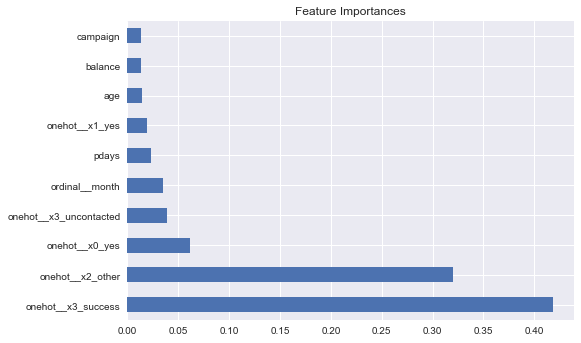

In [762]:
coef1 = pd.Series(best_xgb['clf_xgb'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Terlihat bahwa onehot__x3_success (value success pada kolom poutcome) menjadi feature yang paling berpengaruh, diikuti oleh onehot__x2_other (value other pada kolom contact) dan seterusnya.

## Conclusion and Recommendation

In [763]:
print('Classification Report Default XGBoost : \n', report_default)

Classification Report Default XGBoost : 
               precision    recall  f1-score   support

           0       0.70      0.80      0.75       815
           1       0.74      0.63      0.68       746

    accuracy                           0.72      1561
   macro avg       0.72      0.72      0.72      1561
weighted avg       0.72      0.72      0.72      1561



Berdasarkan hasil classification report model dapat disimpulkan bahwa seandainya model ini digunakan, maka model ini dapat mengurangi marketing perform sebanyak 80% kepada orang yang tidak tertarik berinvestasi deposito berjangka dan juga model ini dapat memprediksi dengan benar 63% nasabah yang tertarik untuk berinvestasi (berdasarkan recall).

Pada model ini juga didapatkan keakuratan prediksi sebesar 74% pada nasabah yang mau berinvestasi deposito berjangka dan juga masih ada sebesar 20% kandidat yang mendapatkan tawaran produk meskipun tidak tertarik.

Untuk model dengan hasil terbaik, XGBoost Tuned, akan lebih baik digunakan pada business problem yang bertolak belakang dengan ini, yaitu mengutamakan penghematan sumber daya dan waktu dengan nilai Recall Negative sebesar 85%. Apabila model ini digunakan, maka secara tidak langsung akan meningkatkan keberhasilan karena marketing hanya akan dilakukan kepada nasabah yang ingin berinvestasi di deposito berjangka.


Recommendation

Beberapa poin yang bisa dilakukan untuk membuat project dan model ini menjadi lebih baik adalah:
- Menambahkan fitur yang memiliki kemungkinan lebih untuk berpengaruh terhadap target, seperti status perkawinan, status pendidikan, dll.
- Memperbaiki atau melakukan improvement pada model yang sudah dibuat, seperti melakukan hyperparameter tuning kembali atau mencoba melakukan dengan algoritma yang berbeda.
- Menganalisa model lebih lanjut untuk mengetahui alasan dan mendapatkan karakteristik yang lebih akurat.

## Model Akhir

In [772]:
# Export model
best_model = xgb_clf.best_estimator_
bank_model = best_model.fit(x, y)
pickle.dump(bank_model, open('xgb_final.sav', 'wb'))